##Diccionario de Datos

- Pregnancies: Número de embarazos.
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.
- BloodPressure: Presión arterial diastólica (mm Hg).
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm).
- Insulin: Niveles séricos de insulina a las 2 horas (mu U/ml).
- BMI: Índice de masa corporal (peso en kg / (altura en m)^2).
- DiabetesPedigreeFunction: Función de pedigrí de diabetes.
- Age: Edad (años).
- Outcome: Variable objetivo (1: diabetes, 0: no diabetes).

## Importamos librerías necesarias para modelado y evaluación

In [25]:
# Importación de bibliotecas

# Manejo de estructuras de datos tabulares (DataFrames), ideal para cargar y analizar datasets
import pandas as pd

# Operaciones numéricas eficientes (arrays, funciones matemáticas, estadísticas básicas)
import numpy as np

# Librería principal para visualización de gráficos personalizados en 2D
import matplotlib.pyplot as plt

# Extensión de matplotlib con estilos predefinidos y gráficos estadísticos avanzados
import seaborn as sns

# Importación de módulos específicos para Machine Learning

# Divide el dataset en subconjuntos de entrenamiento y prueba, útil para evaluar el rendimiento de modelos
from sklearn.model_selection import train_test_split

# Modelo de clasificación basado en múltiples árboles de decisión (bagging), robusto frente a ruido y sobreajuste
from sklearn.ensemble import RandomForestClassifier

# Modelo de clasificación basado en boosting (XGBoost), optimizado para alto rendimiento y control de errores secuenciales
from xgboost import XGBClassifier

# Conjunto de funciones para evaluar el desempeño de modelos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

#Carga y Exploración Inicial de Datos:

In [8]:
# Carga de datos
df = pd.read_csv("/content/diabetes.csv", sep=",")

# Imprime las primeras columnas del df
print("Primeras 5 filas del DataFrame:")
display(df.head())

Primeras 5 filas del DataFrame:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Imprime los tipos de datos del df
print("Tipos de datos del DataFrame:")
display(df.dtypes)

# información general del dataset como el número de entradas, cantidad de columnas, nombres de columnas, tipos de datos y valores nulos.
print("Informacion general del DataFrame")
display(df.info())

# Identificar valores nulos
print("Valores nulos en el DataFrame:")
print(df.isnull().sum())

Tipos de datos del DataFrame:


,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


Informacion general del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

Valores nulos en el DataFrame:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#1- Limpieza de datos:

In [13]:
# Identificación y eliminación de duplicados si es necesario

# Verifica si hay registros duplicados en el DataFrame
print("Número de registros duplicados:")
display(df.duplicated().sum())

Número de registros duplicados:


np.int64(0)

In [14]:
# Corrección de inconsistencias en valores categóricos

# En este dataset, la única variable categórica es 'Outcome', que debe ser 0 o 1
# Verificar los valores únicos para asegurar que estén bien definidos
print("Valores únicos en 'Outcome':", df['Outcome'].unique())

# Si existiera alguna inconsistencia (ej. '1.0' como float o string), se puede normalizar así:
df['Outcome'] = df['Outcome'].astype(int)

Valores únicos en 'Outcome': [1 0]


In [16]:
# Manejo de valores faltantes

# Identifica las columnas donde cero representa un valor faltante encubierto
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Reemplaza los ceros por NaN en esas columnas
for col in cols_with_zeros:
    df[col] = df[col].replace(0, np.nan)

# Muestra cantidad de valores faltantes por columna
print("Valores faltantes tras corrección:")
print(df.isnull().sum())

Valores faltantes tras corrección:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [17]:
# Imputación de valores faltantes (usando la mediana, más robusta ante outliers)

# Imputa la mediana en cada columna afectada
for col in cols_with_zeros:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

# Verifica que no queden NaN
print("Valores faltantes después de imputación:")
print(df.isnull().sum())

Valores faltantes después de imputación:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#2- Exploración de Datos:

##Visualizaciones univariadas

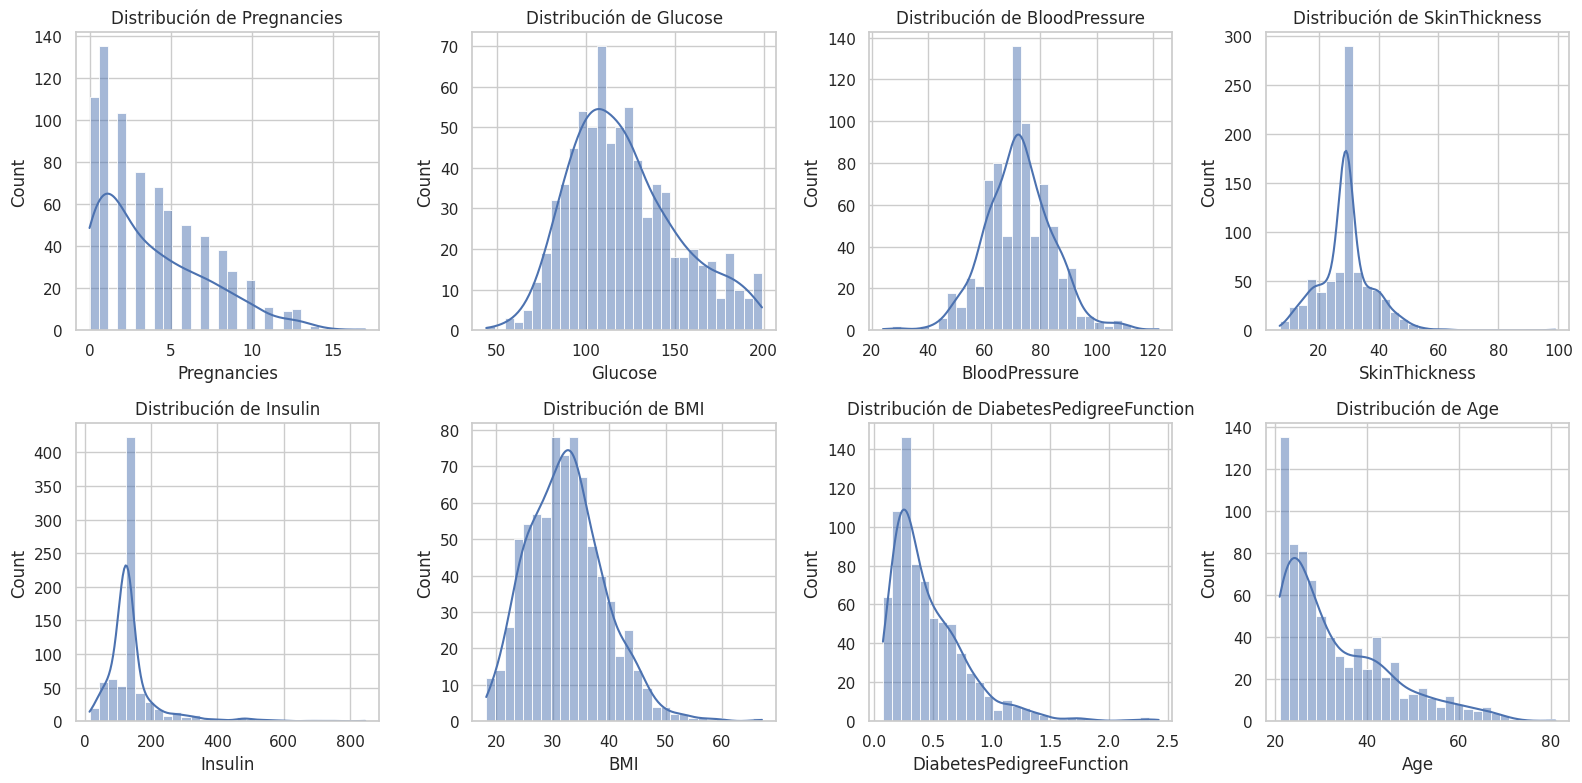

In [20]:
# Establecemos estilo visual para los gráficos
sns.set(style='whitegrid', palette='deep')

# Selección de columnas numéricas relevantes para el análisis
cols_numericas = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Creamos histogramas para ver la distribución de cada variable numérica
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
for ax, col in zip(axes.flatten(), cols_numericas):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

##Observaciones
- **Glucose** y **BMI** muestran distribuciones definidas y son clínicamente relevantes para detectar riesgo metabólico, deben ser consideradas como variables principales en el modelado.

- **Insulin** presenta una fuerte asimetría y valores extremos incluso tras imputación, requiere transformación o discretización.

- **SkinThickness** y **BloodPressure** exhiben dispersión significativa, aunque fueron imputadas, podrían tener baja calidad informativa comparativa.

##Visualizaciones multivariadas

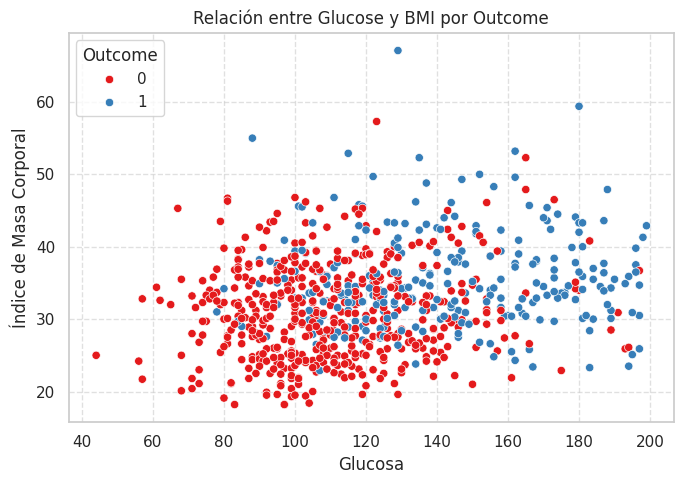

In [21]:
# Diagrama de dispersión entre Glucose y BMI, coloreado por Outcome
plt.figure(figsize=(7,5))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette='Set1')
plt.title('Relación entre Glucose y BMI por Outcome')
plt.xlabel('Glucosa')
plt.ylabel('Índice de Masa Corporal')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##Este gráfico muestra una relación clara entre Glucosa y BMI diferenciada por Outcome:

- Los casos positivos (Outcome = 1, puntos azules) tienden a concentrarse en zonas con glucosa elevada y BMI alto, lo que sugiere una correlación entre ambos factores y presencia de diabetes.

- Los casos negativos (Outcome = 0, puntos rojos) están más distribuidos en rangos bajos-medios de glucosa y BMI.

- La separación visual entre grupos refuerza la utilidad de estas dos variables como predictoras clave en un modelo de clasificación.

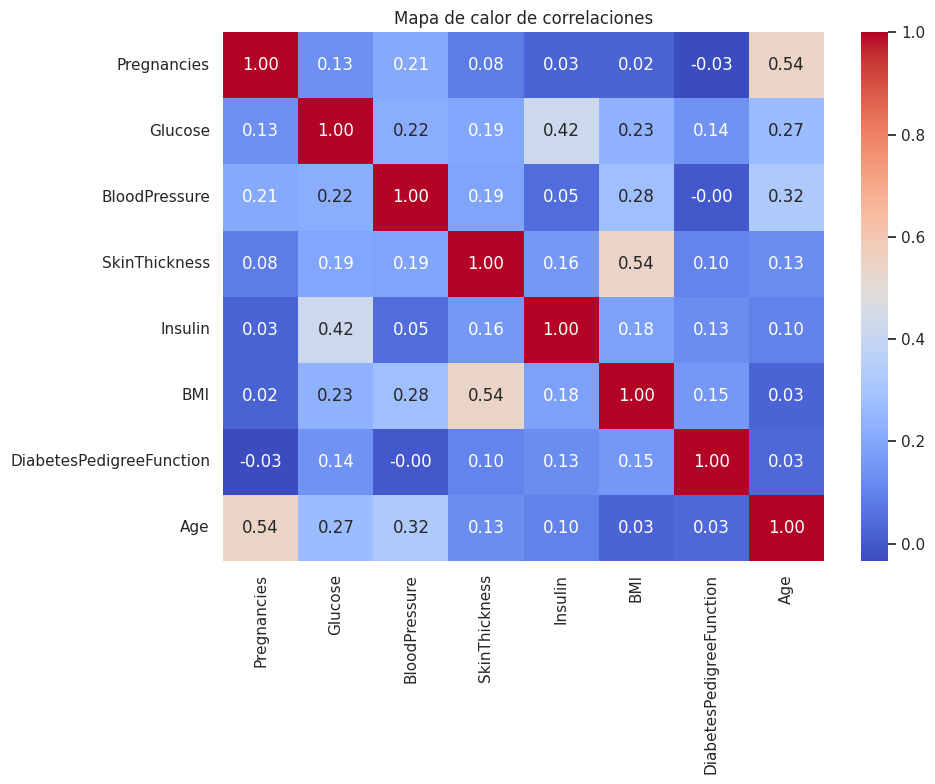

In [22]:
# Mapa de calor de correlaciones entre variables numéricas
plt.figure(figsize=(10, 8))
corr = df[cols_numericas].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlaciones')
plt.tight_layout()
plt.show()

##Resumen Mapa de Calor:

- Pregnancies y Age muestran una correlación moderada (0.54), tiene sentido clínico, ya que mayor edad suele asociarse con más gestaciones.

- Glucose e Insulin con correlación positiva (0.42), reflejan una posible relación fisiológica entre glucosa en sangre y respuesta insulínica.

- BMI y SkinThickness presentan relación media (≈0.39), coherente con acumulación de grasa subcutánea y masa corporal.

- La mayoría de variables tienen correlaciones bajas, lo que indica que aportan información complementaria, un buen signo para modelado multivariable.

Este heatmap ayuda a descartar redundancias fuertes y a priorizar variables sin multicolinealidad.

##Estadísticas descriptivas:

In [24]:
# Calculamos medidas de tendencia y dispersión por variable
stats = df[cols_numericas].agg(['mean', 'median', 'std', 'min', 'max']).T
stats['range'] = stats['max'] - stats['min']
stats = stats[['mean', 'median', 'std', 'range']]  # Reordenamos columnas

# Mostramos tabla resumen
print("Estadísticas descriptivas por variable:\n")
print(stats.round(2))

Estadísticas descriptivas por variable:

                            mean  median    std   range
Pregnancies                 3.85    3.00   3.37   17.00
Glucose                   121.66  117.00  30.44  155.00
BloodPressure              72.39   72.00  12.10   98.00
SkinThickness              29.11   29.00   8.79   92.00
Insulin                   140.67  125.00  86.38  832.00
BMI                        32.46   32.30   6.88   48.90
DiabetesPedigreeFunction    0.47    0.37   0.33    2.34
Age                        33.24   29.00  11.76   60.00


#3- Implementación de Modelos:

In [26]:
# División de datos
# Separamos variables predictoras (X) y variable objetivo (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Dividimos el dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Random Forest
# Creamos y entrenamos el modelo Random Forest con configuración base
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones sobre conjunto de prueba
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:,1]  # Probabilidades para ROC-AUC

# XGBoost
# Creamos y entrenamos el modelo XGBoost (uso de eval_metric opcional)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predicciones y probabilidades
xgb_preds = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:,1]

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [00:11:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


##Evaluación de Modelos

In [27]:
# Función auxiliar para imprimir métricas principales
def mostrar_metricas(nombre, y_true, y_pred, y_prob):
    print(f'\nMétricas para {nombre}')
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 3))
    print("Precision:", round(precision_score(y_true, y_pred), 3))
    print("Recall:", round(recall_score(y_true, y_pred), 3))
    print("F1-score:", round(f1_score(y_true, y_pred), 3))
    print("ROC-AUC:", round(roc_auc_score(y_true, y_prob), 3))

# Evaluamos ambos modelos
mostrar_metricas('Random Forest', y_test, rf_preds, rf_probs)
mostrar_metricas('XGBoost', y_test, xgb_preds, xgb_probs)


Métricas para Random Forest
Accuracy: 0.779
Precision: 0.727
Recall: 0.593
F1-score: 0.653
ROC-AUC: 0.819

Métricas para XGBoost
Accuracy: 0.76
Precision: 0.673
Recall: 0.611
F1-score: 0.641
ROC-AUC: 0.808


##Análisis

- Random Forest logra mayor precision y ROC-AUC, lo que sugiere mejor capacidad discriminativa en este conjunto.

- XGBoost, por otro lado, obtiene un recall levemente superior, útil si el coste de falsos negativos es alto.

Ambos modelos están bastante equilibrados.

##Curvas ROC

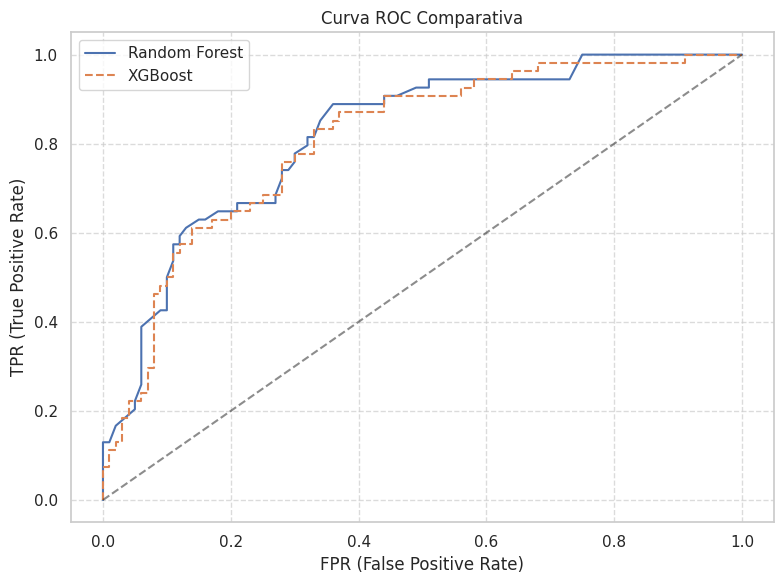

In [28]:
# Calculamos curvas ROC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

# Graficamos curvas comparativas
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.title('Curva ROC Comparativa')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##La curva ROC muestra lo siguiente:

- La línea azul (Random Forest) está más cerca del vértice superior izquierdo, lo que respalda su mejor ROC-AUC.

- La línea naranja (XGBoost), aunque ligeramente por debajo, sigue mostrando buena capacidad de clasificación.

- La línea diagonal representa el rendimiento de un modelo aleatorio, ambos modelos están claramente por encima de ella

##Comparación de Rendimiento

¿Cuál es más adecuado para este dataset?
- Random Forest es ligeramente superior en precision, accuracy y ROC-AUC, lo que lo hace preferible si el foco está en minimizar falsos positivos y tener buena discriminación general.

- XGBoost, al tener mayor recall, puede ser más útil si lo importante es detectar la mayor cantidad posible de casos positivos, incluso a costa de más falsos positivos.

En este caso, dada la buena discriminación de ambos modelos pero con ligera ventaja en precisión, interpretabilidad y ROC-AUC, Random Forest se considera el modelo más adecuado como punto de partida. No obstante, si el contexto penaliza fuertemente los falsos negativos, XGBoost merece atención adicional con optimización de hiperparámetros.

#Predicción para un Paciente

In [30]:
# Medidas diagnósticas simuladas para un paciente
paciente_nuevo = pd.DataFrame({
    'Pregnancies': [3],
    'Glucose': [125],
    'BloodPressure': [70],
    'SkinThickness': [25],
    'Insulin': [100],
    'BMI': [28.5],
    'DiabetesPedigreeFunction': [0.35],
    'Age': [45]
})

# Predicción con Random Forest
pred_rf = rf_model.predict(paciente_nuevo)[0]
proba_rf = rf_model.predict_proba(paciente_nuevo)[0][1]

# Predicción con XGBoost
pred_xgb = xgb_model.predict(paciente_nuevo)[0]
proba_xgb = xgb_model.predict_proba(paciente_nuevo)[0][1]

# Interpretación de resultados
print(f"Random Forest {'Tiene diabetes' if pred_rf == 1 else 'No tiene diabetes'} (probabilidad: {round(proba_rf, 3)})")
print(f"XGBoost       {'Tiene diabetes' if pred_xgb == 1 else 'No tiene diabetes'} (probabilidad: {round(proba_xgb, 3)})")

Random Forest No tiene diabetes (probabilidad: 0.47)
XGBoost       Tiene diabetes (probabilidad: 0.9739999771118164)


##Imagen de Resultados para un Paciente

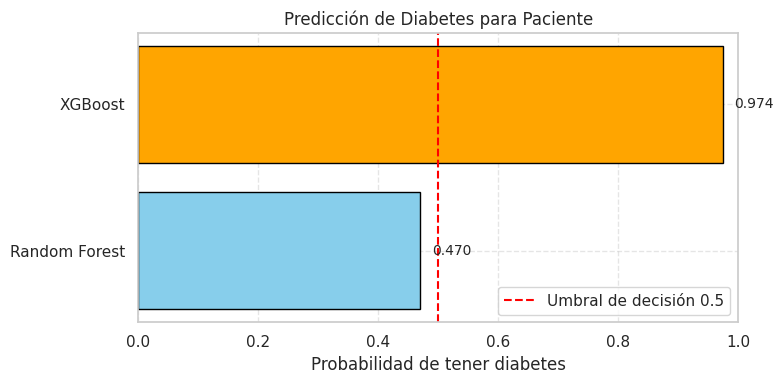

In [32]:
# Datos de probabilidad por modelo
modelos = ['Random Forest', 'XGBoost']
probabilidades = [proba_rf, proba_xgb]
colores = ['skyblue', 'orange']

# Configuración del gráfico
plt.figure(figsize=(8, 4))
bars = plt.barh(modelos, probabilidades, color=colores, edgecolor='black')
plt.axvline(x=0.5, color='red', linestyle='--', label='Umbral de decisión 0.5')

# Etiquetas de probabilidad en cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', va='center', fontsize=10)

plt.title('Predicción de Diabetes para Paciente')
plt.xlabel('Probabilidad de tener diabetes')
plt.xlim(0, 1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Análisis de Predicción

Random Forest predijo que el paciente no tiene diabetes, con una probabilidad de 47%. XGBoost predijo que sí tiene diabetes, con una probabilidad muy alta: 97.4%.

¿Qué significa esto técnicamente?

- Random Forest está indeciso: su probabilidad está cerca del 50%, lo que indica que los datos del paciente no son claramente típicos de casos positivos o negativos.

- XGBoost, en cambio, detecta patrones más marcados y responde con alta seguridad: cree que los síntomas o indicadores del paciente se alinean fuertemente con personas que sí tienen diabetes.

En simples palabras se uso dos sistemas inteligentes para "leer" los datos clínicos de una persona y decir si tiene riesgo de diabetes. Uno de ellos fue incierto (como si dijera "no estoy seguro"), pero el otro fue muy claro al decir "sí, esta persona tiene indicios claros de diabetes".

##Conclusión

Aunque los modelos no coincidieron, el segundo (XGBoost) mostró una confianza muy alta en su diagnóstico positivo. Esto no reemplaza una consulta médica, pero demuestra que la herramienta puede ayudar a detectar posibles casos y guiar decisiones preventivas.